<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/redisxann_usearch_implement_cross_modal_image_text_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run RedisXANN-usearch redis server

In [1]:
!rm -rf redis && git clone https://github.com/redis/redis && \
  cd redis && \
  git checkout 7.0 && \
  make REDIS_CFLAGS='-Werror' BUILD_TLS=yes && make install && \
  which redis-server && redis-server --version

Cloning into 'redis'...
remote: Enumerating objects: 91559, done.
remote: Counting objects: 100% (563/563), done.
remote: Compressing objects: 100% (309/309), done.
remote: Total 91559 (delta 336), reused 395 (delta 254), pack-reused 90996
Receiving objects: 100% (91559/91559), 132.43 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (66786/66786), done.
Branch '7.0' set up to track remote branch '7.0' from 'origin'.
Switched to a new branch '7.0'
cd src && make all
make[1]: Entering directory '/content/redis/src'
    CC Makefile.dep
rm -rf redis-server redis-sentinel redis-cli redis-benchmark redis-check-rdb redis-check-aof *.o *.gcda *.gcno *.gcov redis.info lcov-html Makefile.dep
rm -f adlist.d quicklist.d ae.d anet.d dict.d server.d sds.d zmalloc.d lzf_c.d lzf_d.d pqsort.d zipmap.d sha1.d ziplist.d release.d networking.d util.d object.d db.d replication.d rdb.d t_string.d t_list.d t_set.d t_zset.d t_hash.d config.d aof.d pubsub.d multi.d debug.d sort.d intset.d syncio.d cluster.d crc

In [2]:
!git clone https://github.com/weedge/RedisXANN.git --recursive

Cloning into 'RedisXANN'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 466 (delta 18), reused 41 (delta 7), pack-reused 410
Receiving objects: 100% (466/466), 99.98 KiB | 3.45 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Submodule 'deps/readies' (https://github.com/redislabsmodules/readies) registered for path 'deps/readies'
Submodule 'deps/usearch' (https://github.com/weedge/usearch) registered for path 'deps/usearch'
Cloning into '/content/RedisXANN/deps/readies'...
remote: Enumerating objects: 4578, done.        
remote: Counting objects: 100% (2284/2284), done.        
remote: Compressing objects: 100% (633/633), done.        
remote: Total 4578 (delta 1712), reused 2118 (delta 1609), pack-reused 2294        
Receiving objects: 100% (4578/4578), 703.55 KiB | 5.77 MiB/s, done.
Resolving deltas: 100% (3138/3138), done.
Cloning into '/content/RedisXANN/deps/usearch'...
rem

In [3]:
!curl https://sh.rustup.rs -sSf > rustup.sh

In [4]:
!sh rustup.sh -y

info: downloading installer
info: profile set to 'default'
info: default host triple is x86_64-unknown-linux-gnu
info: syncing channel updates for 'stable-x86_64-unknown-linux-gnu'
info: latest update on 2023-10-05, rust version 1.73.0 (cc66ad468 2023-10-03)
info: downloading component 'cargo'
info: downloading component 'clippy'
info: downloading component 'rust-docs'
info: downloading component 'rust-std'
info: downloading component 'rustc'
info: downloading component 'rustfmt'
info: installing component 'cargo'
info: installing component 'clippy'
info: installing component 'rust-docs'
 13.8 MiB /  13.8 MiB (100 %)   3.4 MiB/s in  4s ETA:  0s
info: installing component 'rust-std'
 24.7 MiB /  24.7 MiB (100 %)   9.0 MiB/s in  3s ETA:  0s
info: installing component 'rustc'
 61.6 MiB /  61.6 MiB (100 %)   9.5 MiB/s in  7s ETA:  0s
info: installing component 'rustfmt'
info: default toolchain set to 'stable-x86_64-unknown-linux-gnu'

  stable-x86_64-unknown-linux-gnu installed - rustc 1.7

In [5]:
!cd RedisXANN && source "$HOME/.cargo/env" && \
  cargo clean && \
  cargo build --lib --manifest-path rust/usearch/Cargo.toml --release

    Updating crates.io index
  Downloaded either v1.9.0
  Downloaded addr2line v0.21.0
  Downloaded errno v0.3.5
  Downloaded lazycell v1.3.0
  Downloaded heck v0.4.1
  Downloaded itoa v1.0.9
  Downloaded iana-time-zone v0.1.58
  Downloaded pnet_macros_support v0.33.0
  Downloaded peeking_take_while v0.1.2
  Downloaded num-traits v0.1.43
  Downloaded shlex v1.2.0
  Downloaded linkme-impl v0.3.17
  Downloaded cxxbridge-flags v1.0.109
  Downloaded glob v0.3.1
  Downloaded termcolor v1.3.0
  Downloaded pnet_base v0.33.0
  Downloaded cfg-if v1.0.0
  Downloaded which v4.4.2
  Downloaded thiserror v1.0.49
  Downloaded cxxbridge-macro v1.0.109
  Downloaded cxx-build v1.0.109
  Downloaded bindgen v0.66.1
  Downloaded linux-raw-sys v0.4.10
  Downloaded autocfg v1.1.0
  Downloaded regex-automata v0.4.3
  Downloaded regex v1.10.2
  Downloaded nix v0.26.4
  Downloaded rustix v0.38.20
  Downloaded quote v1.0.33
  Downloaded aho-corasick v1.1.2
  Downloaded libc v0.2.149
  Downloaded syn v1.0.109
  

In [6]:
!redis-server --daemonize yes \
  --loadmodule RedisXANN/target/release/libredisxann_usearch.so is_remove_serialized_file 1 \
  --port 6666 \
  --dbfilename dump.6666.rdb

## Data

1. Oxford-IIIT 宠物数据集 https://www.robots.ox.ac.uk/~vgg/data/pets/

 images.tar.gz（数据集）和 annotations.tar.gz（groundtruth 数据）

In [7]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O images.tar.gz \
  && rm -rf images && tar -zxvf images.tar.gz

流式输出内容被截断，只能显示最后 5000 行内容。
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images/Abyssinian_22.jpg
image

In [19]:
!ls images/*jpg | wc -l

7390


In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz -O annotations.tar.gz \
  && rm -rf annotations && tar -zxvf annotations.tar.gz

## install deps python package
torch、matplotlib、Pillow(colab defualt install)；安装redisx、CLIP(openai clip,阿里巴巴cn_clip)等依赖

In [ ]:
!pip install torch matplotlib Pillow clip cn_clip redisx

In [12]:
import os
from typing import List

from redis import ResponseError
import torch
from PIL import Image
import pylab
from matplotlib import pyplot as plt
import cn_clip.clip as clip
from cn_clip.clip import available_models


In [107]:
from random import random
from redisx.client import Client
import numpy as np



# change the following configuration for your redis.
REDIS_HOST = "localhost"
REDIS_PORT = 6666
REDIS_DB = 0
REDIS_USERNAME = ""
REDIS_PASSWORD = ""


def get_client() -> Client:
    return Client(
        host=REDIS_HOST,
        port=REDIS_PORT,
        db=REDIS_DB,
        username=REDIS_USERNAME,
        password=REDIS_PASSWORD,
    )


def get_random_vectors(dim: int, n: int):
    return [[(random()/100)-(random()/100) for _ in range(dim)] for _ in range(n)]


def get_numpy_random_vectors_f16(dim: int, n: int):
    #return np.random.default_rng().standard_normal(10, dtype=np.float32)
    return np.random.uniform(-0.1, 0.1, (n, dim)).astype(np.float16)



In [112]:
from typing import Union

from redis import ResponseError
from redisx.define import UsearchQuantizationType
from redisx.ann_usearch import VectorType

cli = get_client()

def create_index(index_name: str, dim:int):
    try:
        return cli.create_index(
            index_name, dim,
            quantization=UsearchQuantizationType.F16)
    except ResponseError as e:
        print(e)
        return None

def get_index(index_name: str):
    try:
        return cli.get_index(index_name)
    except ResponseError as e:
        print(e)
        return None

def delete_index(index_name: str):
    try:
        return cli.del_index(index_name)
    except ResponseError as e:
        print(e)
        return False

def add_vector(index_name: str, name: str, vector: Union[VectorType, str]):
    try:
        return cli.add_vector(index_name, name, vector)
    except ResponseError as e:
        print(e)
        return None

def get_vector(index_name: str, name: str):
    try:
        return cli.get_vector(index_name, name)
    except ResponseError as e:
        print(e)
        return None

def kann_search(index_name: str, k: int, query_vector: Union[VectorType, str]):
    try:
        return cli.kann_search(index_name, k, query_vector)
    except ResponseError as e:
        print(e)
        return False

def build_index():
    """
    创建存储图片、文本向量的Vector索引：(使用usearch库建立索引)
    * 图片Key名称为"index_images"、文本Key名称为"index_texts"。
    * 向量维度为1024。
    * 计算向量距离函数为IP。
    """
    ret = get_index("index_images")
    if ret is None:
        create_index("index_images", 1024)
    ret = get_index("index_texts")
    if ret is None:
        create_index("index_texts", 1024)

def test_search():
    dim = 1024
    print("delete_index res {}".format(delete_index("test_idx0")))
    print("create_index res {}".format(create_index("test_idx0", dim)))
    print("get_index res {}".format(get_index("test_idx0")))
    print("\n======= kann search =====\n")
    for i, vector in enumerate(get_random_vectors(dim, 10)):
        name = "n%i" % i
        print("add_vector {} {} res {}".format(
            name, vector[0:10], add_vector("test_idx0", name, vector)))
        # print("get_vector res {}".format(get_vector("test_idx0", name)))

    print("after add, get_index res {}".format(get_index("test_idx0")))
    k = 10
    for i, query_vector in enumerate(get_random_vectors(dim, 3)):
        print("{}. kann_search k {} query_vector {} res {}".format(
            i, k, query_vector[0:10],
            kann_search("test_idx0", k, query_vector)))

    print("delete_index res {}".format(delete_index("test_idx0")))

def test_search_f16():
    dim = 1024
    print("delete_index res {}".format(delete_index("test_idx0")))
    print("create_index res {}".format(create_index("test_idx0", dim)))
    print("get_index res {}".format(get_index("test_idx0")))
    print("\n======= kann search =====\n")
    for i, vector in enumerate(get_numpy_random_vectors_f16(dim, 10)):
        name = "n%i" % i
        print("add_vector {} {} res {}".format(
            name, vector[0:10], add_vector("test_idx0", name, vector)))
        print("get_vector res {}".format(get_vector("test_idx0", name)))

    print("after add, get_index res {}".format(get_index("test_idx0")))
    k = 10
    for i, query_vector in enumerate(get_numpy_random_vectors_f16(dim, 3)):
        print("{}. kann_search k {} query_vector {} res {}".format(
            i, k, query_vector[0:10],
            kann_search("test_idx0", k, query_vector)))

    print("delete_index res {}".format(delete_index("test_idx0")))

In [108]:
get_numpy_random_vectors_f16(10, 2)

array([[-0.0856  , -0.01377 , -0.0764  ,  0.007244,  0.04535 ,  0.06995 ,
        -0.002237, -0.0421  ,  0.05643 , -0.01041 ],
       [-0.0665  , -0.09924 ,  0.01348 ,  0.09235 ,  0.0984  ,  0.0692  ,
        -0.04645 , -0.05298 , -0.01962 ,  0.009575]], dtype=float16)

In [110]:
test_search()

Index: usearch.test_idx0 does not exist
delete_index res False
create_index res True
get_index res {'name': 'usearch.test_idx0', 'dimensions': 1024, 'metric': 'IP', 'quantization': 'F16', 'connectivity': 10, 'expansion_add': 128, 'expansion_search': 3, 'serialization_file_path': '/content/0.usearch.test_idx0.idx', 'serialized_length': 112, 'index_size': 0, 'index_capacity': 10, 'index_mem_usage': 336}

======= kann search =====

add_vector n0 [-0.0028326138326248617, -0.0064106411776702985, 0.0037339711069741374, 0.0019788233495959574, 0.0009644785888106178, -0.0015081332457302296, -0.0001923928863371907, 0.003584017690706625, -0.001978258479844114, 0.001858674201983426] res True
add_vector n1 [0.004201307924998815, -0.0054024703998147745, 0.00547220106945007, -0.002490440572473364, 0.0025366635390742477, -0.0019429300342376464, 0.008052033474821457, -0.0018811227609084888, -0.0018354645495923779, -0.0068955065781046865] res True
add_vector n2 [-0.002220565169130416, -0.000235164626225

In [113]:
test_search_f16()

Index: usearch.test_idx0 does not exist
delete_index res False
create_index res True
get_index res {'name': 'usearch.test_idx0', 'dimensions': 1024, 'metric': 'IP', 'quantization': 'F16', 'connectivity': 10, 'expansion_add': 128, 'expansion_search': 3, 'serialization_file_path': '/content/0.usearch.test_idx0.idx', 'serialized_length': 112, 'index_size': 0, 'index_capacity': 10, 'index_mem_usage': 336}

======= kann search =====

add_vector n0 [ 0.02853    -0.00010794  0.01987     0.076       0.0691     -0.016
 -0.06       -0.04715     0.01096    -0.01752   ] res True
get_vector res {'id': 483518237825302540, 'name': 'usearch.test_idx0.n0', 'data': [b'0.028533935546875', b'-0.00010800361633300781', b'0.019866943359375', b'0.07598876953125', b'0.069091796875', b'-0.0160064697265625', b'-0.05999755859375', b'-0.047149658203125', b'0.01096343994140625', b'-0.01751708984375', b'0.08197021484375', b'0.049560546875', b'0.0679931640625', b'0.08502197265625', b'0.07061767578125', b'-0.062561035

In [59]:
print(delete_index("index_images"))
print(delete_index("index_texts"))
build_index()


1
1
Index: usearch.index_images does not exist
Index: usearch.index_texts does not exist


In [60]:
get_index("index_images")

{'name': 'usearch.index_images',
 'dimensions': 1024,
 'metric': 'IP',
 'quantization': 'F16',
 'connectivity': 10,
 'expansion_add': 128,
 'expansion_search': 3,
 'serialization_file_path': '/content/0.usearch.index_images.idx',
 'serialized_length': 112,
 'index_size': 0,
 'index_capacity': 10,
 'index_mem_usage': 336}

In [61]:
get_index("index_texts")

{'name': 'usearch.index_texts',
 'dimensions': 1024,
 'metric': 'IP',
 'quantization': 'F16',
 'connectivity': 10,
 'expansion_add': 128,
 'expansion_search': 3,
 'serialization_file_path': '/content/0.usearch.index_texts.idx',
 'serialized_length': 112,
 'index_size': 0,
 'index_capacity': 10,
 'index_mem_usage': 336}

## load vision model
use ResNet-50

In [18]:
# https://github.com/mlfoundations/open_clip
model, preprocess = clip.load_from_name("RN50", device="cuda", download_root="./")


100%|███████████████████████████████████████| 294M/294M [00:18<00:00, 16.8MiB/s]


Loading vision model config from /usr/local/lib/python3.10/dist-packages/cn_clip/clip/model_configs/RN50.json
Loading text model config from /usr/local/lib/python3.10/dist-packages/cn_clip/clip/model_configs/RBT3-chinese.json
Model info {'embed_dim': 1024, 'image_resolution': 224, 'vision_layers': [3, 4, 6, 3], 'vision_width': 64, 'vision_patch_size': None, 'vocab_size': 21128, 'text_attention_probs_dropout_prob': 0.1, 'text_hidden_act': 'gelu', 'text_hidden_dropout_prob': 0.1, 'text_hidden_size': 768, 'text_initializer_range': 0.02, 'text_intermediate_size': 3072, 'text_max_position_embeddings': 512, 'text_num_attention_heads': 12, 'text_num_hidden_layers': 3, 'text_type_vocab_size': 2}


In [ ]:
model.eval()

In [23]:
img = Image.open("/content/images/boxer_18.jpg")

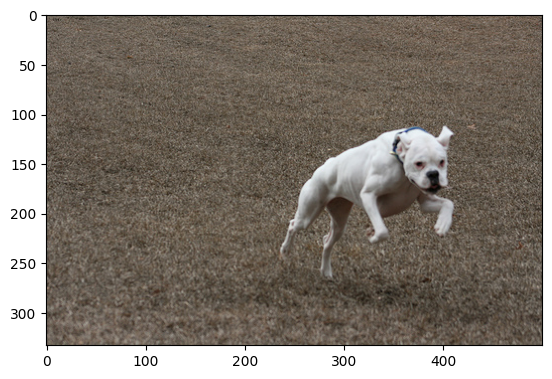

In [24]:
plt.imshow(img)

In [131]:
def insert_images(image_dir):
    """
    需要输入图片的路径，该方法会自动遍历路径下的图片文件。
    同时，该方法会调用extract_image_features方法（通过CLIP模型对图片文件进行预处理，并返回图片的特征信息），
    并行将返回的特征信息存入redisXAnn-usearch中。
    * 向量索引名称为“index_images”（固定）。
    * Key为图片路径及其文件名，例如“/content/images/boxer_18.jpg”。
    * 特征信息为1024维向量。
    """
    file_names = [f for f in os.listdir(image_dir) if (f.endswith('.jpg') or f.endswith('.jpeg'))]
    for file_name in file_names:
        image_feature = extract_image_features(image_dir + "/" + file_name)
        add_vector("index_images", image_dir + "/" + file_name, image_feature)

def extract_image_features(img_name):
    """
    该方法将通过CLIP模型对图片文件进行预处理，并返回图片的特征信息（1024维向量）。
    """
    image_data = Image.open(img_name).convert("RGB")
    infer_data = preprocess(image_data)
    infer_data = infer_data.unsqueeze(0).to("cuda")
    with torch.no_grad():
        image_features = model.encode_image(infer_data)
        #print("{}\n".format(image_features))
    image_features /= image_features.norm(dim=-1, keepdim=True)
    #print("{}\n".format(image_features))
    return image_features.cpu().numpy()[0]



In [ ]:
vector = extract_image_features("/content/images/boxer_18.jpg")
vector,len(vector)
#print("{}\n".format(vector))


In [ ]:
add_vector("index_images","/content/images/boxer_18.jpg", vector)

In [ ]:
res = get_vector("index_images","/content/images/boxer_18.jpg")
print(res)

In [ ]:
print("{}".format(kann_search("index_images",1,vector)))

In [122]:
def insert_text(text):
    """
    需要输入需存储的文本，该方法会调用extract_text_features方法（通过CLIP模型对文本进行预处理，并返回文本的特征信息），
    并行将返回的特征信息存入redisXAnn-usearch中。
    存入Tair的格式为：
    * 向量索引名称为“index_texts”（固定）。
    * Key为文本内容，例如“奔跑的狗”。
    * 特征信息为1024维向量。
    """
    text_features = extract_text_features(text)
    add_vector("index_texts", text, text_features)


def extract_text_features(text):
    """
    该方法将通过CLIP模型对文本进行预处理，并返回文本的特征信息（1024维向量）。
    """
    text_data = clip.tokenize([text]).to("cuda")
    with torch.no_grad():
        text_features = model.encode_text(text_data)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    return text_features.cpu().numpy()[0]  # [1, 1024]



In [123]:
def query_images_by_text(q_text, topK):
    """
    该方法将用于以文搜图。
    需要输入待搜索的文本内容（text）和返回的结果数量（topK）。
    该方法会通过CLIP 模型将待查询的文本内容进行预处理，然后通过USEARCH.SEARCH.KANN命令，
    查询redis数据库中与该文本描述最为相似的图片。
    将返回目标图片名称name，id和相似值similarity，
    这里选择默认metric: IP(内积), 相似值similarity为距离，越小，表示相似度越高。
    """
    q_text_feature = extract_text_features(q_text)
    result = kann_search("index_images", topK, q_text_feature)
    print("topK {} q {} result {}",topK,q_text_feature,result)
    if result == None:
      return None
    for k, s in result["vals"]:
        print("{}:{}\n".format(k,s))
        img = Image.open(s["name"].decode('utf-8'))
        plt.imshow(img)
        #pylab.show()


def query_texts_by_image(image_path, topK=3):
    """
    该方法将用于以图搜文。
    需要输入待查询图片的路径和返回的结果数量（topK）。
    该方法会通过CLIP 模型将待查询的图片内容进行预处理，然后通过Vector的TVS.KNNSEARCH命令，查询Tair数据库中与该图片最为吻合的文本。
    将返回目标文本的Key名称和相似距离（distance），其中相似距离（distance）越小，表示相似度越高。
    """
    image_feature = extract_image_features(image_path)
    result = kann_search("index_texts", topK, image_feature)
    print("topK {} q {} result {}",topK,image_feature,result)
    if result == None:
      return None
    for i,item in enumerate(result["vals"]):
        print("{}=>{}\n".format(i,item))



In [ ]:
# 宠物图片数据集的路径为“./images”，写入图片数据。
insert_images("./images")

In [125]:
get_index("index_images")

{'name': 'usearch.index_images',
 'dimensions': 1024,
 'metric': 'IP',
 'quantization': 'F16',
 'connectivity': 10,
 'expansion_add': 128,
 'expansion_search': 3,
 'serialization_file_path': '/content/0.usearch.index_images.idx',
 'serialized_length': 15846592,
 'index_size': 7391,
 'index_capacity': 14780,
 'index_mem_usage': 37867168}

In [126]:
# 写入文本示例数据（"狗"、"白色的狗"、"奔跑的白色的狗"）。
insert_text("狗")
insert_text("白色的狗")
insert_text("奔跑的白色的狗")


In [127]:
get_index("index_texts")

{'name': 'usearch.index_texts',
 'dimensions': 1024,
 'metric': 'IP',
 'quantization': 'F16',
 'connectivity': 10,
 'expansion_add': 128,
 'expansion_search': 3,
 'serialization_file_path': '/content/0.usearch.index_texts.idx',
 'serialized_length': 6544,
 'index_size': 3,
 'index_capacity': 10,
 'index_mem_usage': 20971792}

In [ ]:
# 以文搜图，查询最符合文本"奔跑的狗"的三张图。
query_images_by_text("奔跑的狗", 3)

In [ ]:
# 以图搜文，指定图片路径，查询比较符合图片描述的文本。
query_texts_by_image("./images/boxer_18.jpg",3)


In [ ]:
print(delete_index("index_images"))
print(delete_index("index_texts"))